# Assignment 3 - Stock Time Series
#### 1) In a command window: conda install pandas-datareader

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 6

import matplotlib.pyplot as plt
%matplotlib inline

#### 2) Download the adjusted close price for AAPL, MSFT, IBM, AMZN and EBAY using the following code:

In [2]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)

In [3]:
aapl = web.DataReader('WIKI/AAPL', 'quandl', start, end)
msft = web.DataReader('WIKI/MSFT', 'quandl', start, end)
ibm = web.DataReader('WIKI/IBM', 'quandl', start, end)
amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)
ebay = web.DataReader('WIKI/EBAY', 'quandl', start, end)

3) Get the data for the last 60 months, select the adjusted monthend close for each.  

In [4]:
aapl

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,144.450,144.96,143.7800,144.02,22328979.0,0.0,1.0,143.866270,144.374209,143.198978,143.438008,22328979.0
2017-06-29,144.710,145.13,142.2800,143.68,31116980.0,0.0,1.0,144.125219,144.543522,141.705039,143.099382,31116980.0
2017-06-28,144.490,146.11,143.1601,145.83,21915939.0,0.0,1.0,143.906108,145.519562,142.581583,145.240693,21915939.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-02,602.840,610.69,600.2500,607.79,11862800.0,0.0,1.0,77.473342,78.482177,77.140491,78.109486,83039600.0
2012-08-01,615.905,616.40,603.0000,606.81,13732200.0,0.0,1.0,79.152377,79.215991,77.493904,77.983543,96125400.0
2012-07-31,603.230,611.70,602.7200,610.76,16511700.0,0.0,1.0,77.523463,78.611976,77.457921,78.491173,115581900.0


In [5]:
# collect all daily Adjusted Close into one dataframe - df

slist = []

securities = [aapl, msft, ibm, amzn, ebay]
secnames = ['aapl', 'msft', 'ibm', 'amzn', 'ebay']

for s in range(5):
    ser = securities[s].AdjClose
    ser.name = secnames[s]
    slist.append(ser)
            
df = pd.concat(slist, axis=1)
df

,aapl,msft,ibm,amzn,ebay
Date,,,,,
2017-06-30,143.438008,68.219505,150.719070,968.00,34.920000
2017-06-29,143.099382,67.784040,151.013003,975.93,34.510000
2017-06-28,145.240693,69.080538,152.178938,990.33,35.310000
...,...,...,...,...,...
2012-08-02,78.109486,25.187301,165.807770,230.81,17.219829
2012-08-01,77.983543,25.377134,166.430242,232.09,17.267039
2012-07-31,78.491173,25.428906,167.112403,233.30,17.428339


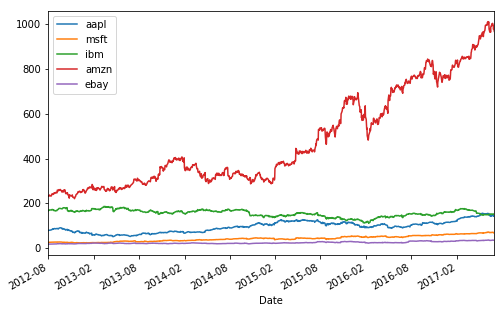

In [6]:
#preview the daily chart
df.plot(figsize=(8,5));

In [7]:
#downsample to month end.
df = df.resample('M',convention='end').last()
df

,aapl,msft,ibm,amzn,ebay
Date,,,,,
2012-07-31,78.491173,25.428906,167.112403,233.30,17.428339
2012-08-31,85.857594,26.770314,166.858424,248.27,18.675469
2012-09-30,86.098296,25.849595,177.648345,254.32,19.029544
...,...,...,...,...,...
2017-04-30,142.486415,67.375780,155.523983,924.99,33.400000
2017-05-31,152.142689,69.120125,149.543338,994.62,34.300000
2017-06-30,143.438008,68.219505,150.719070,968.00,34.920000


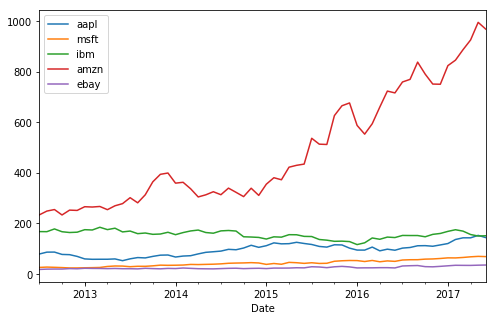

In [8]:
#check the monthly chart, which should be similar to the daily chart above
df.plot(figsize=(8,5));

In [9]:
tmp = pd.DataFrame()
for i in range(12):
    tmp[i]=df['aapl'].shift(i*5)
tmp

,0,1,2,3,4,5,6,7,8,9,10,11
Date,,,,,,,,,,,,
2012-07-31,78.491173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-31,85.857594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-30,86.098296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-30,142.486415,109.154917,93.428693,94.044912,108.476437,118.672237,102.158735,85.114262,74.572182,59.408242,57.562728,86.098296
2017-05-31,152.142689,114.389454,101.843140,93.919781,105.773184,119.358921,112.983997,87.468686,66.541004,64.384994,57.727044,76.833538
2017-06-30,143.438008,119.851150,104.248477,105.867380,114.960396,124.767353,104.861462,89.981776,70.365412,63.001925,57.742693,75.896485


In [10]:
corr = tmp.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.781266,0.448609,0.267180,0.266826,0.499249,0.777715,0.773429,0.059631,-0.699114,-0.962400,-0.234409
1,0.781266,1.000000,0.767296,0.458288,0.170807,-0.103078,-0.224573,0.397838,0.722244,-0.253214,-0.881859,-0.752335
2,0.448609,0.767296,1.000000,0.770079,0.420963,0.037383,-0.479094,-0.700816,0.330575,0.773961,0.116802,-0.513528
...,...,...,...,...,...,...,...,...,...,...,...,...
9,-0.699114,-0.253214,0.773961,0.594344,-0.818250,-0.806480,-0.651734,-0.714141,-0.423360,1.000000,-0.002897,-0.773389
10,-0.962400,-0.881859,0.116802,0.733519,0.627136,-0.915118,-0.850878,-0.772293,-0.888088,-0.002897,1.000000,-0.184847
11,-0.234409,-0.752335,-0.513528,-0.346095,-0.045122,0.043117,-0.562404,-0.245853,0.881105,-0.773389,-0.184847,1.000000


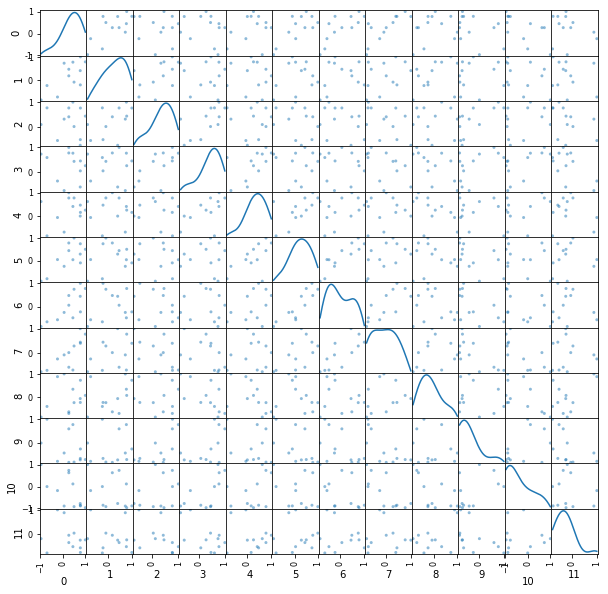

In [11]:
pd.plotting.scatter_matrix(corr, diagonal='kde', figsize=(10, 10));

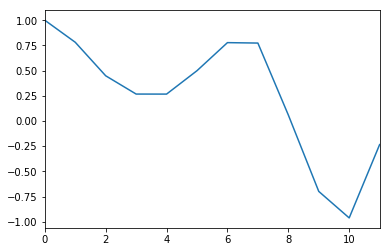

In [12]:
corr[0].plot()

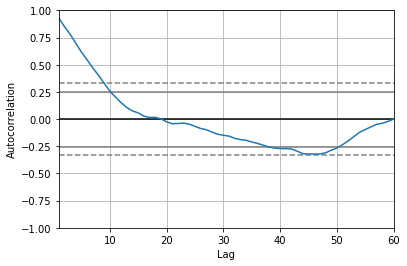

In [13]:
pd.plotting.autocorrelation_plot(df['aapl']);

#### 4) Use pandas autocorrelation_plot to plot the autocorrelation of the adjusted monthend

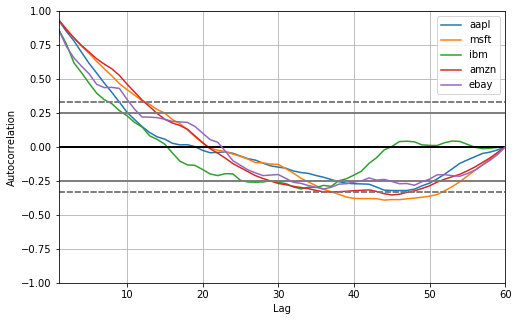

In [14]:
plt.figure(figsize=(8,5))
for s in df.columns:
    pd.plotting.autocorrelation_plot(df[s],label=s)


#### 5) Calculate the monthly return over the period for each stock using the “shift trick” on the lecture slide titled Shifting (Note: you should end up with a time series 59 months long)

In [15]:
# use shift trick to calculate return
# instead of calculate each stock as Time Serie, use the data frame to do in one shock.

mreturn=df / df.shift(1) -1
mreturn.head()

,aapl,msft,ibm,amzn,ebay
Date,,,,,
2012-07-31,NaN,NaN,NaN,NaN,NaN
2012-08-31,0.093850,0.052751,-0.001520,0.064166,0.071558
2012-09-30,0.002803,-0.034393,0.064665,0.024369,0.018959
2012-10-31,-0.107607,-0.040995,-0.062280,-0.084252,-0.002274
2012-11-30,-0.012196,-0.059531,-0.018582,0.082256,0.094488


In [16]:
mreturn = mreturn.dropna()
mreturn

,aapl,msft,ibm,amzn,ebay
Date,,,,,
2012-08-31,0.093850,0.052751,-0.001520,0.064166,0.071558
2012-09-30,0.002803,-0.034393,0.064665,0.024369,0.018959
2012-10-31,-0.107607,-0.040995,-0.062280,-0.084252,-0.002274
...,...,...,...,...,...
2017-04-30,-0.000070,0.039478,-0.079534,0.043371,-0.005064
2017-05-31,0.067770,0.025890,-0.038455,0.075276,0.026946
2017-06-30,-0.057214,-0.013030,0.007862,-0.026764,0.018076


#### 6) Use pandas autocorrelation_plot to plot the autocorrelation of the monthly returns. Are they autocorrelated? Why or why not?

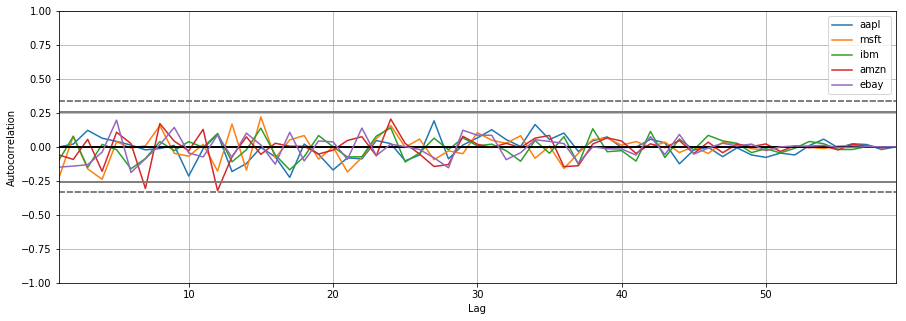

In [17]:
plt.figure(figsize=(15,5))
for s in mreturn.columns:
    pd.plotting.autocorrelation_plot(mreturn[s],label=s)
    
# by looking at the plot below, the auto-correlation for each stock is very weak, as they all lower than %25 threshold.
# the rationale could be because stock return is cyclic, but not seasonal.


#### 7) OPTIONAL: Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)

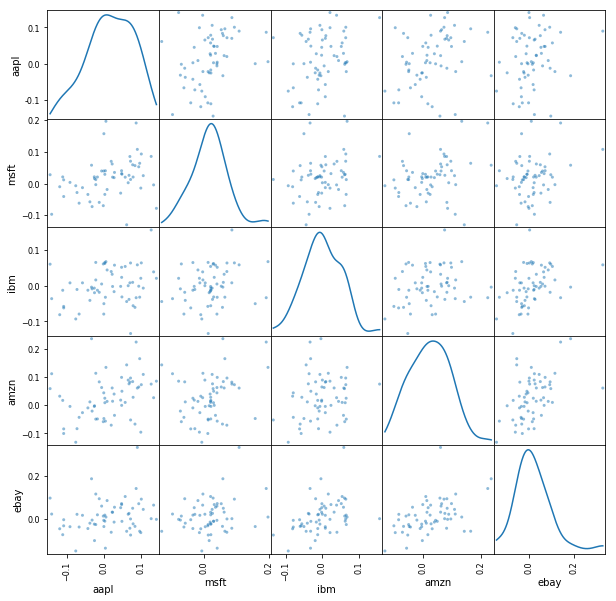

In [18]:
pd.plotting.scatter_matrix(mreturn, diagonal='kde', figsize=(10, 10));

#### 8) OPTIONAL: Following the instructions in https://glowingpython.blogspot.ca/2012/10/visualizing-correlation-matrices.html visualize the correlation of the returns of all pairs of stocks (2 bonus marks)

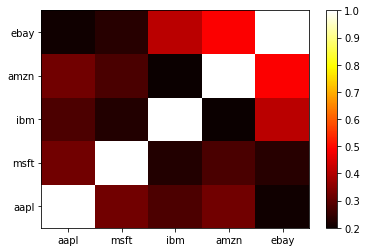

In [19]:
# Using pylab to plot the return correlation between every two stocks.
# As the axis tick is available in numeric, not easy to read..

from numpy import corrcoef, arange
from pylab import pcolor, show, colorbar, xticks, yticks

# plotting the correlation matrix
R = corrcoef(mreturn.T)
pcolor(R, cmap='hot')
colorbar()
yticks(arange(0.5,5.5),mreturn.columns)
xticks(arange(0.5,5.5),mreturn.columns)

show()


As a result, clear correlation noted between similar business, e.g., eBay and Amazon; or eBay and IBM.

# Conlusion